In [1]:
import pandas as pd
df = pd.read_excel (r'C:\Users\jennifer.rasal\OneDrive - Marine Stewardship Council\Documents\Kaggle\knitting\test_results.xlsx')

In [3]:
for col in df.columns:
    print(col)

Timestamp
Who taught YOU to knit? Tick all that apply [Parent]
Who taught YOU to knit? Tick all that apply [Sibling]
Who taught YOU to knit? Tick all that apply [Grandparent]
Who taught YOU to knit? Tick all that apply [Aunt/Uncle]
Who taught YOU to knit? Tick all that apply [Spouse]
Who taught YOU to knit? Tick all that apply [Friend]
Who taught YOU to knit? Tick all that apply [Friend's parent]
Who taught YOU to knit? Tick all that apply [School teacher]
Who taught YOU to knit? Tick all that apply [Self taught (includes using Youtube or Books to teach yourself)]
Who taught YOU to knit? Tick all that apply [Step parent]
Who taught YOU to knit? Tick all that apply [Children]
Who taught YOU to knit? Tick all that apply [Step children]
Who taught YOU to knit? Tick all that apply [Knitting Teacher]
How old were you when you learnt how to knit?
Have you taught anyone else to knit (or tried to teach)? Tick all that apply [Parent]
Have you taught anyone else to knit (or tried to teach)? Tick

(<Figure size 432x288 with 3 Axes>,
 {('I would rather not say',): (0.0, 0.0, 0.3650026838432635, 1.0),
  ('£50,000-£59,999 / €58,800-€70,400 / $69,400-$83,200',): (0.3698336017176596,
   0.0,
   0.08588298443370908,
   1.0),
  ('£40,000-£49,999 / €47,000-€58,700 / $55,500-$69,300',): (0.46054750402576483,
   0.0,
   0.08588298443370908,
   1.0),
  ('£30,000-£39,999 / €35,300-€46,900 / $41,600-$55,400',): (0.5512614063338701,
   0.0,
   0.06870638754696726,
   1.0),
  ('<£19,999 / <€23,500 / <$27,700',): (0.6247987117552335,
   0.0,
   0.08588298443370897,
   1.0),
  ('£20,000-£29,999 / €23,500-€35,200 / $27,800-$41,500',): (0.7155126140633385,
   0.0,
   0.07514761137949548,
   1.0),
  ('£70,000+ / €23,500+ / $97,100+',): (0.7954911433172301,
   0.0,
   0.15029522275899085,
   1.0),
  ('£60,000-£69,999 / €70,500-€82,200 / $83,300-$97,000',): (0.9506172839506172,
   0.0,
   0.049382716049382706,
   1.0)})

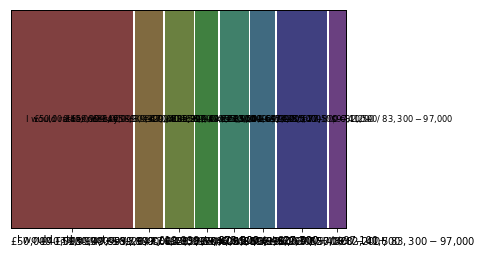

In [5]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df,['What is your household income bracket?'])

In [7]:
crosstable=pd.crosstab(df['What is your household income bracket?'], df["What is your gender?"])
crosstable

What is your gender?,Female,Male,Non binary,Queer,non-binary
What is your household income bracket?,,,,,
"<£19,999 / <€23,500 / <$27,700",38,2,0,0,0
I would rather not say,169,0,0,0,0
"£20,000-£29,999 / €23,500-€35,200 / $27,800-$41,500",34,0,0,0,1
"£30,000-£39,999 / €35,300-€46,900 / $41,600-$55,400",31,0,0,1,0
"£40,000-£49,999 / €47,000-€58,700 / $55,500-$69,300",40,0,0,0,0
"£50,000-£59,999 / €58,800-€70,400 / $69,400-$83,200",38,1,1,0,0
"£60,000-£69,999 / €70,500-€82,200 / $83,300-$97,000",21,0,1,0,0
"£70,000+ / €23,500+ / $97,100+",68,1,0,0,0


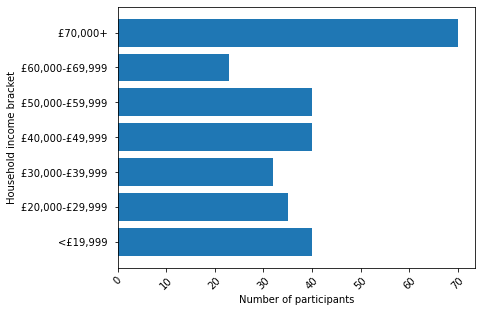

In [16]:
money = df["What is your household income bracket?"].value_counts()
money = money.to_dict()
del money["I would rather not say"]

import collections
import matplotlib.pyplot as plt

od = collections.OrderedDict(sorted(money.items()))

names = list(od.keys())
money_range = []
for name in names:
    split_string = name.split("/", 1)
    money_range.append(split_string[0])
values = list(od.values())
#names.append(names.pop(names.index(names[0])))
#values.append(values.pop(values.index(values[0])))

from matplotlib.pyplot import figure

plt.barh(range(len(od)), values, tick_label=money_range)
plt.xticks(rotation=45)
plt.xlabel("Number of participants")
plt.ylabel("Household income bracket")
plt.savefig('knitting_household_income.png', bbox_inches='tight')
plt.show()

In [19]:
money_range

[['<£19,999 ', ' <€23,500 / <$27,700'],
 ['£20,000-£29,999 ', ' €23,500-€35,200 / $27,800-$41,500'],
 ['£30,000-£39,999 ', ' €35,300-€46,900 / $41,600-$55,400'],
 ['£40,000-£49,999 ', ' €47,000-€58,700 / $55,500-$69,300'],
 ['£50,000-£59,999 ', ' €58,800-€70,400 / $69,400-$83,200'],
 ['£60,000-£69,999 ', ' €70,500-€82,200 / $83,300-$97,000'],
 ['£70,000+ ', ' €23,500+ / $97,100+']]

# Age

In [12]:
age = df["How old are you in years?"].value_counts()
age = age.to_dict()

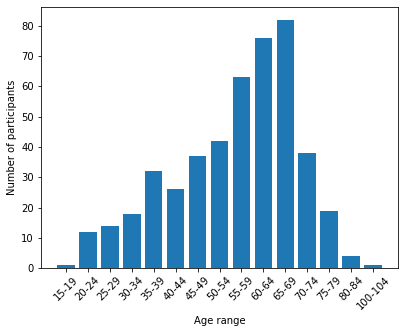

In [14]:
import collections

od = collections.OrderedDict(sorted(age.items()))

names = list(od.keys())
values = list(od.values())
names.append(names.pop(names.index(names[0])))
values.append(values.pop(values.index(values[0])))

plt.bar(range(len(od)), values, tick_label=names)
plt.xticks(rotation=45)
plt.xlabel("Age range")
plt.ylabel("Number of participants")
plt.savefig('knitting_age.png', bbox_inches='tight')
plt.show()

In [118]:
import numpy as np
df = df.rename(columns={"What is your gender?": "gender"})
df['gender'] = np.where((df.gender != 'Male') & (df.gender != 'Female'),'Other',df.gender)
gender = df["gender"].value_counts()
gender

Female    456
Other       7
Male        4
Name: gender, dtype: int64

In [119]:
df_gender = gender.to_frame()

<Figure size 432x288 with 0 Axes>

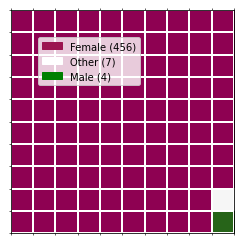

In [120]:
import matplotlib.patches as mpatches

fig = plt.figure()
colormap = plt.cm.PiYG
plt.matshow(waffle, cmap=colormap)
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])
values = df_gender['gender']
categories = df_gender.index
value_sign = ''
values_cumsum = np.cumsum(values)
total_values = values_cumsum[len(values_cumsum) - 1]
legend_handles = []
colour_values = {"Female": "#9c1550", "Male": "green", "Other": "white"}
for i, category in enumerate(categories):
    label_str = category + ' (' + value_sign + str(values[i]) + ')'
    color_val = colour_values[category]
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
plt.legend(handles=legend_handles, loc = 'upper left',
          bbox_to_anchor=(0.1, 0.2, 0.95, 0.7)) #positioning legends

plt.savefig('knitting_gender.png')

In [92]:
num_rows = 10
row = 0
column = 0
data = []
colors_list = ['slateblue', 'limegreen', 'red']
colors = {df_gender.index[i]:colors_list[i] for i in range(len(df_gender))}
for category, count in df_gender.iteritems():
    rows = []
    columns = []
    for _ in range(count):
        if row == num_rows:
            row = 0
            column += 1
        rows.append(row)
        columns.append(column)        
        row += 1
    data.append(go.Scatter(x=rows, y=columns, mode='markers', 
                           marker={'color': colors[category], 'symbol': 'star', 'size': 20},                        
                           name=category))
fig = go.Figure(dict(data=data, layout=go.Layout(plot_bgcolor='white',
                                                 xaxis=dict(visible=False), 
                                                 yaxis=dict(visible=False))))
fig.update_layout(title='User dynamics in July 2021', title_x=0.45, title_y=0.85, font=dict(size=18))
fig.show()

TypeError: 'Series' object cannot be interpreted as an integer

In [93]:
df_gender

,gender,percent
Female,456,0.976445
Other,7,0.014989
Male,4,0.008565


In [96]:
range(count)

TypeError: 'Series' object cannot be interpreted as an integer

In [70]:
values_cumsum[i]

456

In [72]:
colormap(1)

(0.23437707945098038, 0.3055417303294118, 0.7596795275882353, 1.0)

In [22]:
import flask

In [23]:
app = flask.Flask(__name__, static_url_path='',
            static_folder='static',
            template_folder='template')
app.config["DEBUG"] = True

In [24]:
from flask import render_template, redirect, url_for

@app.route("/home")
def home():
    return render_template("home.html")
@app.route("/<name>")
def user(name):
    return f"Hello-- {name}!"
@app.route("/admin")
def admin():
    return redirect(url_for("home"))

In [25]:
if __name__ == '__main__':
    app.run(host="localhost", port=8000, debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\jennifer.rasal\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [26]:
<script src="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.5.0/Chart.min.js"></script>

SyntaxError: invalid syntax (Temp/ipykernel_15324/2103582828.py, line 1)